## Solutions for Assignment 4: Exploring Yelp Reviews

**NOTE: THIS ASSIGNMENT IS OPTIONAL**

You must complete **one** out of homeworks #4, #5, and #6.

**Due date: Monday, 10/31 by the end of day**

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This assignment is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

You can choose data from Cleveland, Charlotte, or Pittsburgh. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_json('./data/reviews_pittsburgh.json.gz', orient='records', lines=True)

In [3]:
reviews.head()

,business_id,review_id,stars,text
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o..."
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [4]:
def split_and_lower(text_string):
    """
    Split a string into individual words and make them 
    all lower case
    """
    return [word.lower() for word in text_string.split()]

In [5]:
reviews['formatted_text'] = reviews['text'].apply(split_and_lower)

In [6]:
reviews.head()

,business_id,review_id,stars,text,formatted_text
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,"[i'll, be, the, first, to, admit, that, i, was..."
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,"[wow., so, surprised, at, the, one, and, two, ..."
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o...","[if, i, can, give, this, place, no, stars, i, ..."
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...,"[this, place, epitomizes, the, rumored, transf..."
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...,"[here's, why, i, don't, write, reviews, for, c..."


### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nhand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
stop = stopwords.words('english')
print(stop[:5])

['i', 'me', 'my', 'myself', 'we']


In [10]:
def remove_stop_words(list_of_words):
    """
    Keep only words that are not in the list of 
    stop words
    """
    return [word for word in list_of_words if word not in stop]

In [11]:
reviews['formatted_text'] = reviews['formatted_text'].apply(remove_stop_words)

### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

Add two new columns to the review DataFrame: `polarity` and `subjectivity`.

In [12]:
import textblob

In [13]:
def create_textblob(list_of_words):
    """
    From the list of words, create a TextBlob object.
    
    Note that the TextBlob() object needs a single string, so 
    we must first join the list of words together.
    """
    text_string = " ".join(list_of_words)
    return textblob.TextBlob(text_string)

In [14]:
blobs = reviews['formatted_text'].apply(create_textblob)

In [15]:
# create polarity and subjectivity columns
reviews['polarity'] = [b.polarity for b in blobs]
reviews['subjectivity'] = [b.subjectivity for b in blobs]

### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

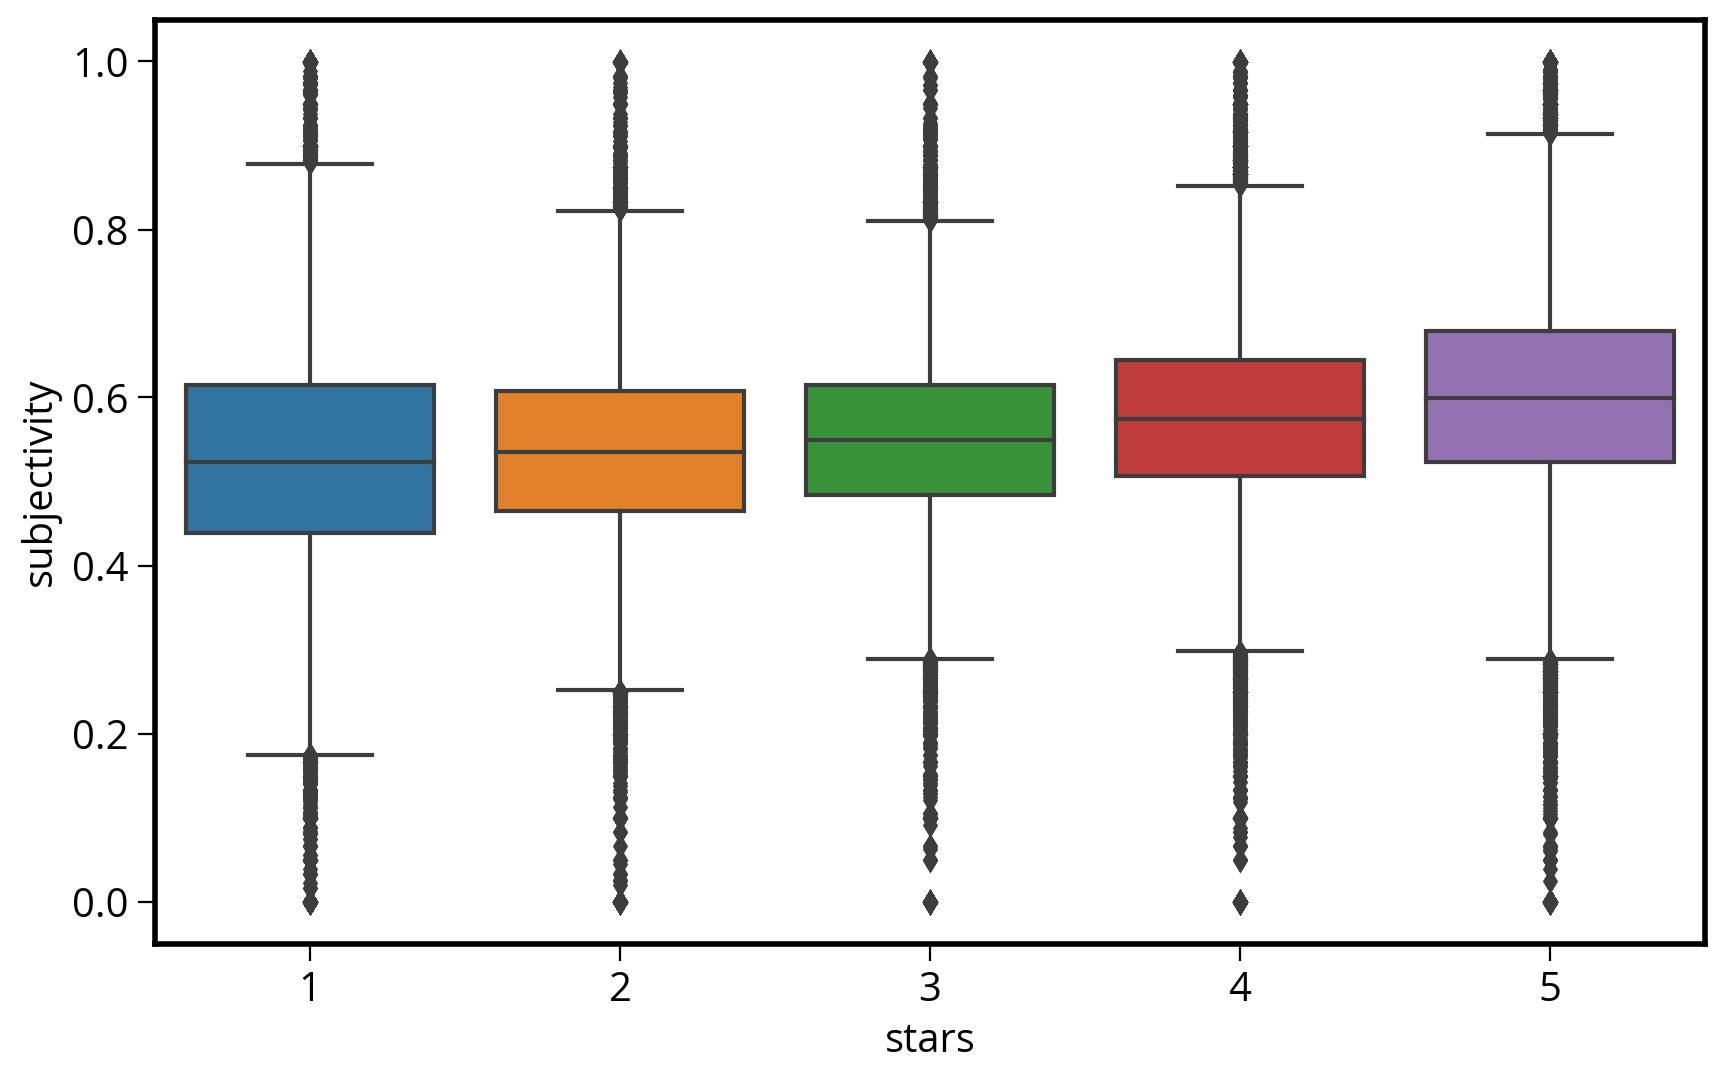

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="stars", y="subjectivity", data=reviews, ax=ax);

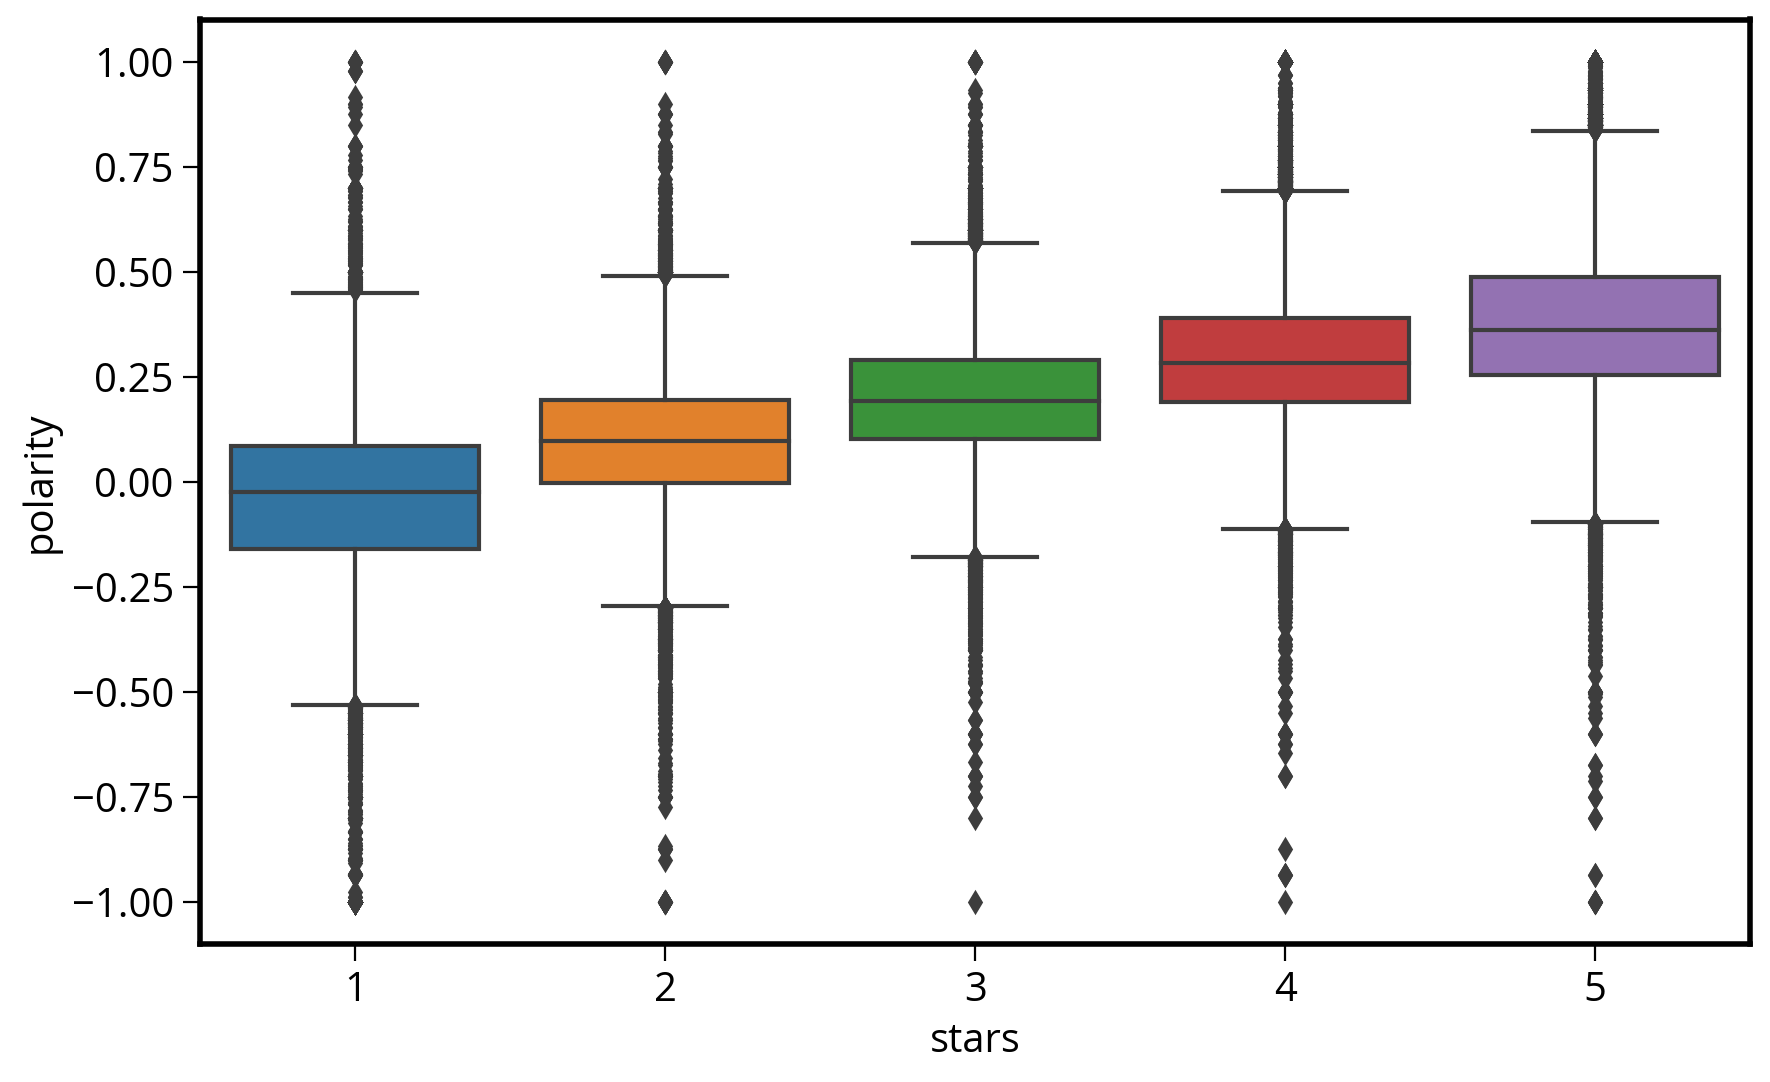

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="stars", y="polarity", data=reviews, ax=ax);

**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

* Reviews with higher stars tend to bit slightly more subjective. Average reviews (3 stars) have the tightest concentration around subjectivity of 0.5 (unbiased in terms of subjectivity).
* As expected, there is a clear trend where higher star reviews are more postively polarized and low star reviews are negatively polarized. Sentiment analysis works!

### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [19]:
R = reviews.sample(1000)

In [20]:
R

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
61392,JLbgvGM4FXh9zNP4O5ZWjQ,SAkvYJhCfNNI4YxUuW2Ruw,5,I can see how some people might consider this ...,"[see, people, might, consider, up-tight, atmos...",0.493750,0.822222
134043,KTPRYqiFdLowAUEAnN7e3g,mRPDxovzY50y8f-z4QJXpA,5,I'll keep it short n sweet for you guys. This ...,"[i'll, keep, short, n, sweet, guys., place, go...",0.260920,0.471456
86226,e9KXojla4OuVP7qcC5LNsg,Z-7qQodD1i90BU3tsM4wCA,4,Neat little pub with decent soups (I had a han...,"[neat, little, pub, decent, soups, (i, hankeri...",0.108796,0.357407
156423,OwGCYIwyIHPMfLVOT_7-1g,t93VOM5HgqoYVpuaO_IUsA,1,Very friendly service. Truly terrible executio...,"[friendly, service., truly, terrible, executio...",-0.115972,0.675000
147487,pCwOCE-cycl6cMEa9O6bZQ,4YdEfGIRum5d_LavoOjIIQ,5,Ventured over to Hello Bistro with my best fri...,"[ventured, hello, bistro, best, friend, visiti...",0.392361,0.692361
...,...,...,...,...,...,...,...
128163,K-SsrPH0nFExdpLrTo1X1w,J6naskDQmriSamplP0hGGg,4,While the rest of the Northeast and eastern US...,"[rest, northeast, eastern, us, infested, burge...",0.168485,0.612823
124499,dLc1d1zwd1Teu2QED5TmlA,ncpwYH3I_fNnmVxp2X2JBA,4,Came here for an early summer dinner. With som...,"[came, early, summer, dinner., reviews, indica...",0.079193,0.585559
31309,FgTzITgrmvrZqoHvkTSDzA,WQyEeObvUyfr0ehMwkkhpw,1,Came to pittsburgh for the first time and had ...,"[came, pittsburgh, first, time, check, bettis'...",0.078175,0.372619
94250,EIFW8Cz9S7-jWWdnZrH3pg,OrCfKCfgItB8g_jMXY0pVA,3,$14.99 for all you can get isn't bad but the f...,"[$14.99, get, bad, food, ok., there's, tons, f...",0.150000,0.652381


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [21]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [22]:
X = reshape_data(R)

In [23]:
X.head()

,polarity,stars,review_id,word
0,0.6,1,KrTMzm70EBz1WbTHv7ppWg,cover
1,0.6,1,KrTMzm70EBz1WbTHv7ppWg,charge
2,0.6,1,KrTMzm70EBz1WbTHv7ppWg,saint
3,0.6,1,KrTMzm70EBz1WbTHv7ppWg,patrick's
4,0.6,1,KrTMzm70EBz1WbTHv7ppWg,day?!


**Question:** what is the operation performed by the `reshape_data()` function?

The `formatted_text` column stores a list of the words in each review. The `reshape_data()` function creates a new DataFrame where each row corresponds to a single word in the list of words of a review. So now, each review has as many rows in the DataFrame as words in the review.

#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  

**Hint:** you can combine the three results using either the `pandas.concat()` or the `pandas.merge()` function.

In [24]:
# the frequency of each word
A = X.groupby('word').size().to_frame(name='size')

# the average polarity of each review that this word appears in
B = X.groupby('word')['polarity'].mean()

# the average number of stars of each review that this word appears in
C = X.groupby('word')['stars'].mean()

# combine into a single DataFrame
A = pd.concat([A, B, C], axis=1)

#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [25]:
df = A.loc[(A['size']>50)]

#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.6.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 

Make sure the figure is big enough so that you can make out some of the words, especially at low and high polarity values. You should be able to see a strong trend between polarity and user stars, and some of the most common words occurring in these reviews. 

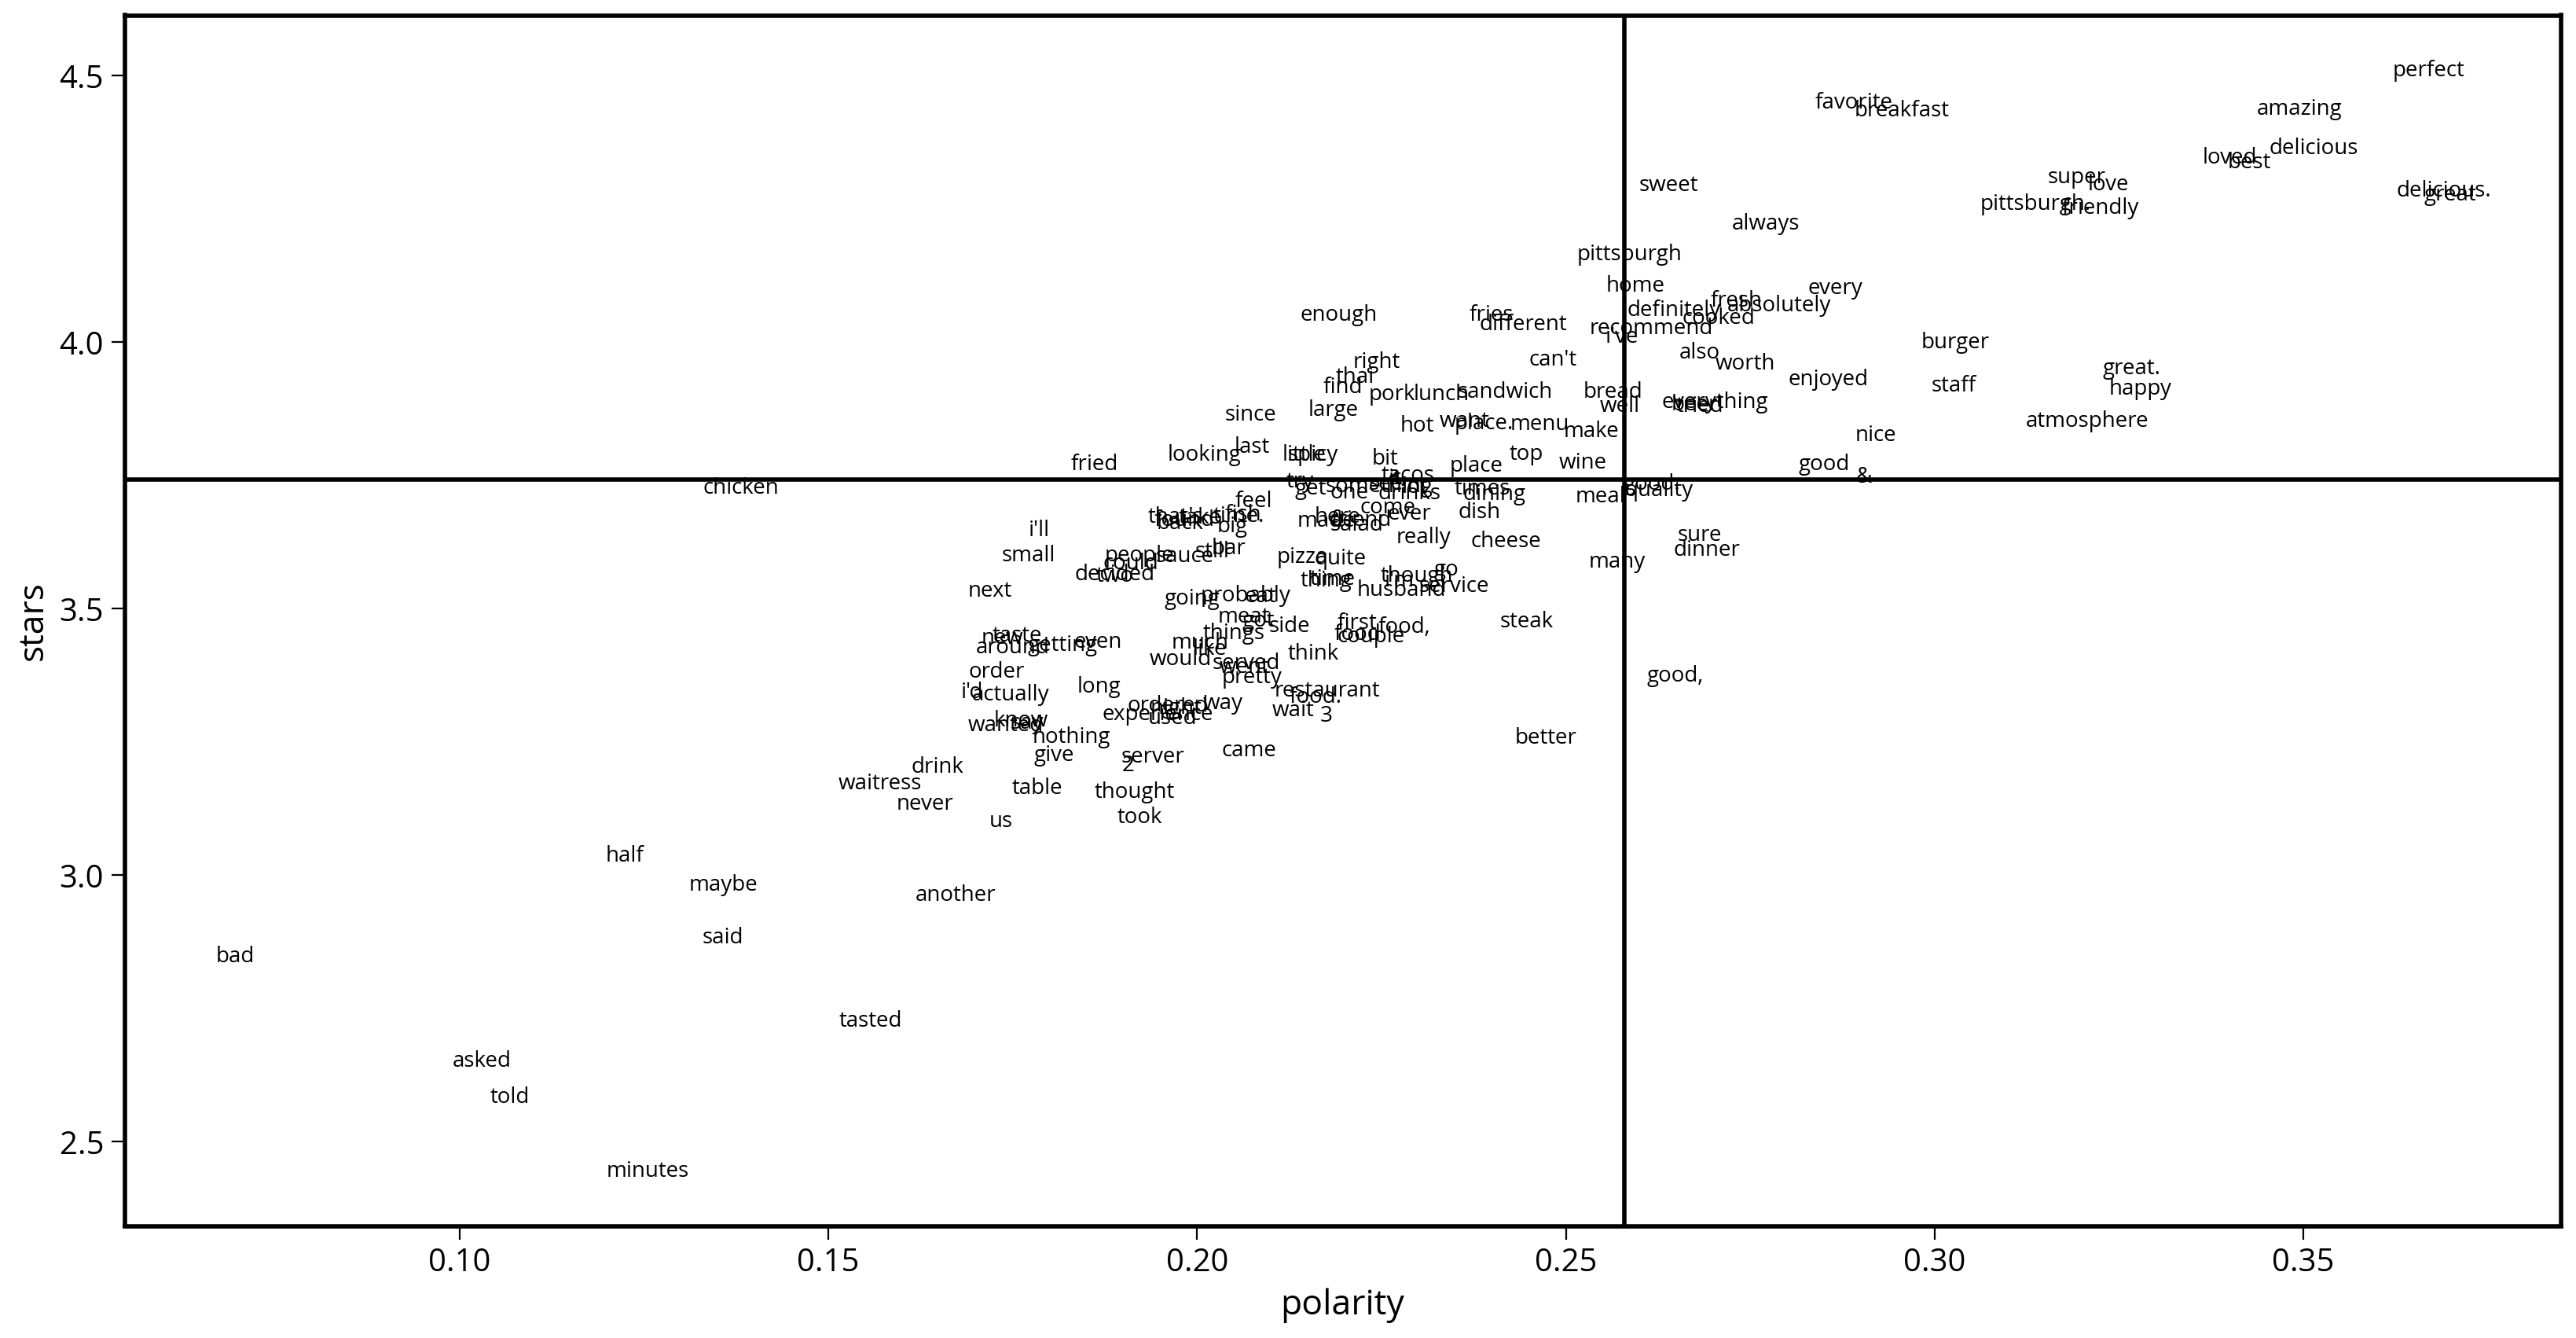

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))

# use iterrows to loop over each row
for i, row in df.iterrows():
    
    # scatter plot
    ax.scatter(row['polarity'], row['stars'], marker='.', s=0)
    
    # add the text label
    ax.text(row['polarity'], row['stars'], i, ha='center', va='center')
    
# avg polarity
avg_polarity = reviews['polarity'].mean()

# avg stars 
avg_stars = reviews['stars'].mean()

# add horizontal and vertical lines
ax.axhline(y=avg_stars, color='black', linewidth=2)
ax.axvline(x=avg_polarity, color='black', linewidth=2)

# add labels
ax.set_xlabel("polarity", fontsize=16)
ax.set_ylabel("stars", fontsize=16);

## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2020 ACS 5-year data set for your county of interest.

You have two options to find the correct variable names:
- Search through: https://api.census.gov/data/2020/acs/acs5/variables.html
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.

**Hints**

The FIPS codes for the various state/counties are: 

- Pittsburgh
    - PA code: '42'
    - County code: '003' (Allegheny County)
- Cleveland
    - OH code: '39'
    - County code: '035' (Cuyahoga County)
- Charlotte
    - NC code: '37'
    - County code: '119' (Mecklenburg County)

In [27]:
# Increase col width so rows don't get truncated
pd.options.display.max_colwidth = 200

In [28]:
import cenpy

In [29]:
# Initialize the ACS connection
acs = cenpy.remote.APIConnection("ACSDT5Y2020")

In [30]:
# FIPS codes for Pittsburgh
pa_code = '42'
county_code = '003'

In [31]:
# Search for median household income
acs.varslike("MEDIAN HOUSEHOLD INCOME", by='concept').sort_index()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B19013A_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER),int,B19013A,0,NaN,NaN,"B19013A_001EA,B19013A_001M,B19013A_001MA",NaN
B19013B_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER),int,B19013B,0,NaN,NaN,"B19013B_001EA,B19013B_001M,B19013B_001MA",NaN
B19013C_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER),int,B19013C,0,NaN,NaN,"B19013C_001EA,B19013C_001M,B19013C_001MA",NaN
B19013D_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER),int,B19013D,0,NaN,NaN,"B19013D_001EA,B19013D_001M,B19013D_001MA",NaN
B19013E_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER),int,B19013E,0,NaN,NaN,"B19013E_001EA,B19013E_001M,B19013E_001MA",NaN
B19013F_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER),int,B19013F,0,NaN,NaN,"B19013F_001EA,B19013F_001M,B19013F_001MA",NaN
B19013G_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES HOUSEHOLDER),int,B19013G,0,NaN,NaN,"B19013G_001EA,B19013G_001M,B19013G_001MA",NaN
B19013H_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),"MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)",int,B19013H,0,NaN,NaN,"B19013H_001EA,B19013H_001M,B19013H_001MA",NaN
B19013I_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (HISPANIC OR LATINO HOUSEHOLDER),int,B19013I,0,NaN,NaN,"B19013I_001EA,B19013I_001M,B19013I_001MA",NaN
B19013_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS),int,B19013,0,NaN,NaN,"B19013_001EA,B19013_001M,B19013_001MA",NaN


In [32]:
# variables we want
variables = ['NAME', 'B19013_001E']

In [33]:
# Download the data for all census tracts for Allegheny county
census_data = acs.query(
    cols=variables,
    geo_unit=f"tract:*",
    geo_filter={"state": pa_code, "county": county_code},
)

# Convert to float
census_data["B19013_001E"] = census_data["B19013_001E"].astype(float)

census_data.head()

,NAME,B19013_001E,state,county,tract
0,"Census Tract 4110.01, Allegheny County, Pennsylvania",211484.0,42,003,411001
1,"Census Tract 4110.02, Allegheny County, Pennsylvania",103542.0,42,003,411002
2,"Census Tract 4120.02, Allegheny County, Pennsylvania",152440.0,42,003,412002
3,"Census Tract 4120.03, Allegheny County, Pennsylvania",152734.0,42,003,412003
4,"Census Tract 4120.04, Allegheny County, Pennsylvania",119861.0,42,003,412004


### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `cenpy` to set the correct map service and download census tracts for the desired geography using the `esri2gpd` package
- Merge the downloaded census tracts with the household income DataFrame, making sure to specify the proper columns to perform the merge on.

In [34]:
import esri2gpd

In [35]:
acs.set_mapservice("tigerWMS_Census2020")

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2020)
With MapServer: Census 2020 WMS

In [36]:
acs.mapservice.layers[6]

(ESRILayer) Census Tracts

Download census tracts:

In [37]:
acs.mapservice.layers[6]._baseurl

'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/6'

In [38]:
# Use SQL to return geometries only for Allegheny County in PA
where_clause = f"STATE = '{pa_code}' AND COUNTY = '{county_code}'"

# Query for census tracts
tracts = esri2gpd.get(acs.mapservice.layers[6]._baseurl, where=where_clause)

In [39]:
tracts.head()

,geometry,OBJECTID,AREALAND,ALANDHIST,AREAWATER,AWATERHIST,COUNTY,EFFDATE,ESTABDATE,FUNCSTAT,...,UR,VINTAGE,CENTLON,CENTLAT,INTPTLON,INTPTLAT,HU100,POP100,STGEOMETRY.AREA,STGEOMETRY.LEN
0,"POLYGON ((-80.01783 40.49735, -80.01787 40.49725, -80.01782 40.49728, -80.01770 40.49734, -80.01765 40.49734, -80.01759 40.49734, -80.01747 40.49733, -80.01723 40.49733, -80.01718 40.49733, -80.01...",50,1957399,1957399,0,0,003,1.577837e+12,1.568730e+12,S,...,None,70,-080.0059004,+40.4860050,-080.0059004,+40.4860050,1076,2767,3.387423e+06,12632.620650
1,"POLYGON ((-79.90955 40.45669, -79.90944 40.45665, -79.90912 40.45653, -79.90902 40.45649, -79.90897 40.45647, -79.90867 40.45635, -79.90846 40.45627, -79.90837 40.45624, -79.90810 40.45613, -79.90...",722,1277523,1277523,0,0,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.8947061,+40.4593486,-079.8856510,+40.4573260,1309,2231,2.209114e+06,9968.200414
2,"POLYGON ((-79.91130 40.44715, -79.91144 40.44698, -79.90874 40.44609, -79.90856 40.44603, -79.90829 40.44594, -79.90844 40.44565, -79.90838 40.44563, -79.90819 40.44557, -79.90836 40.44525, -79.90...",723,1396263,1396263,0,0,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.9000103,+40.4411678,-079.8969935,+40.4452265,1928,4007,2.413135e+06,12271.847145
3,"POLYGON ((-79.87202 40.41257, -79.87197 40.41238, -79.87193 40.41222, -79.87159 40.41193, -79.87134 40.41172, -79.87102 40.41192, -79.87097 40.41197, -79.87091 40.41192, -79.87073 40.41176, -79.87...",728,2584742,2584742,158463,158463,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.8571281,+40.4010706,-079.8537042,+40.4017394,1278,2247,4.735428e+06,12629.357838
4,"POLYGON ((-79.97096 40.40342, -79.97093 40.40336, -79.97087 40.40325, -79.97083 40.40287, -79.97087 40.40281, -79.96990 40.40156, -79.96950 40.40105, -79.96918 40.40063, -79.96905 40.40047, -79.96...",734,6565373,6565373,20848,20848,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.9394841,+40.3909315,-079.9555215,+40.3994999,579,1238,1.136601e+07,27448.279621


In [40]:
income = tracts.merge(
    census_data,
    left_on=["STATE", "COUNTY", "TRACT"],
    right_on=["state", "county", "tract"],
)

In [41]:
# select only where the income is greater than zero
income = income.loc[income['B19013_001E'] > 0]

## 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

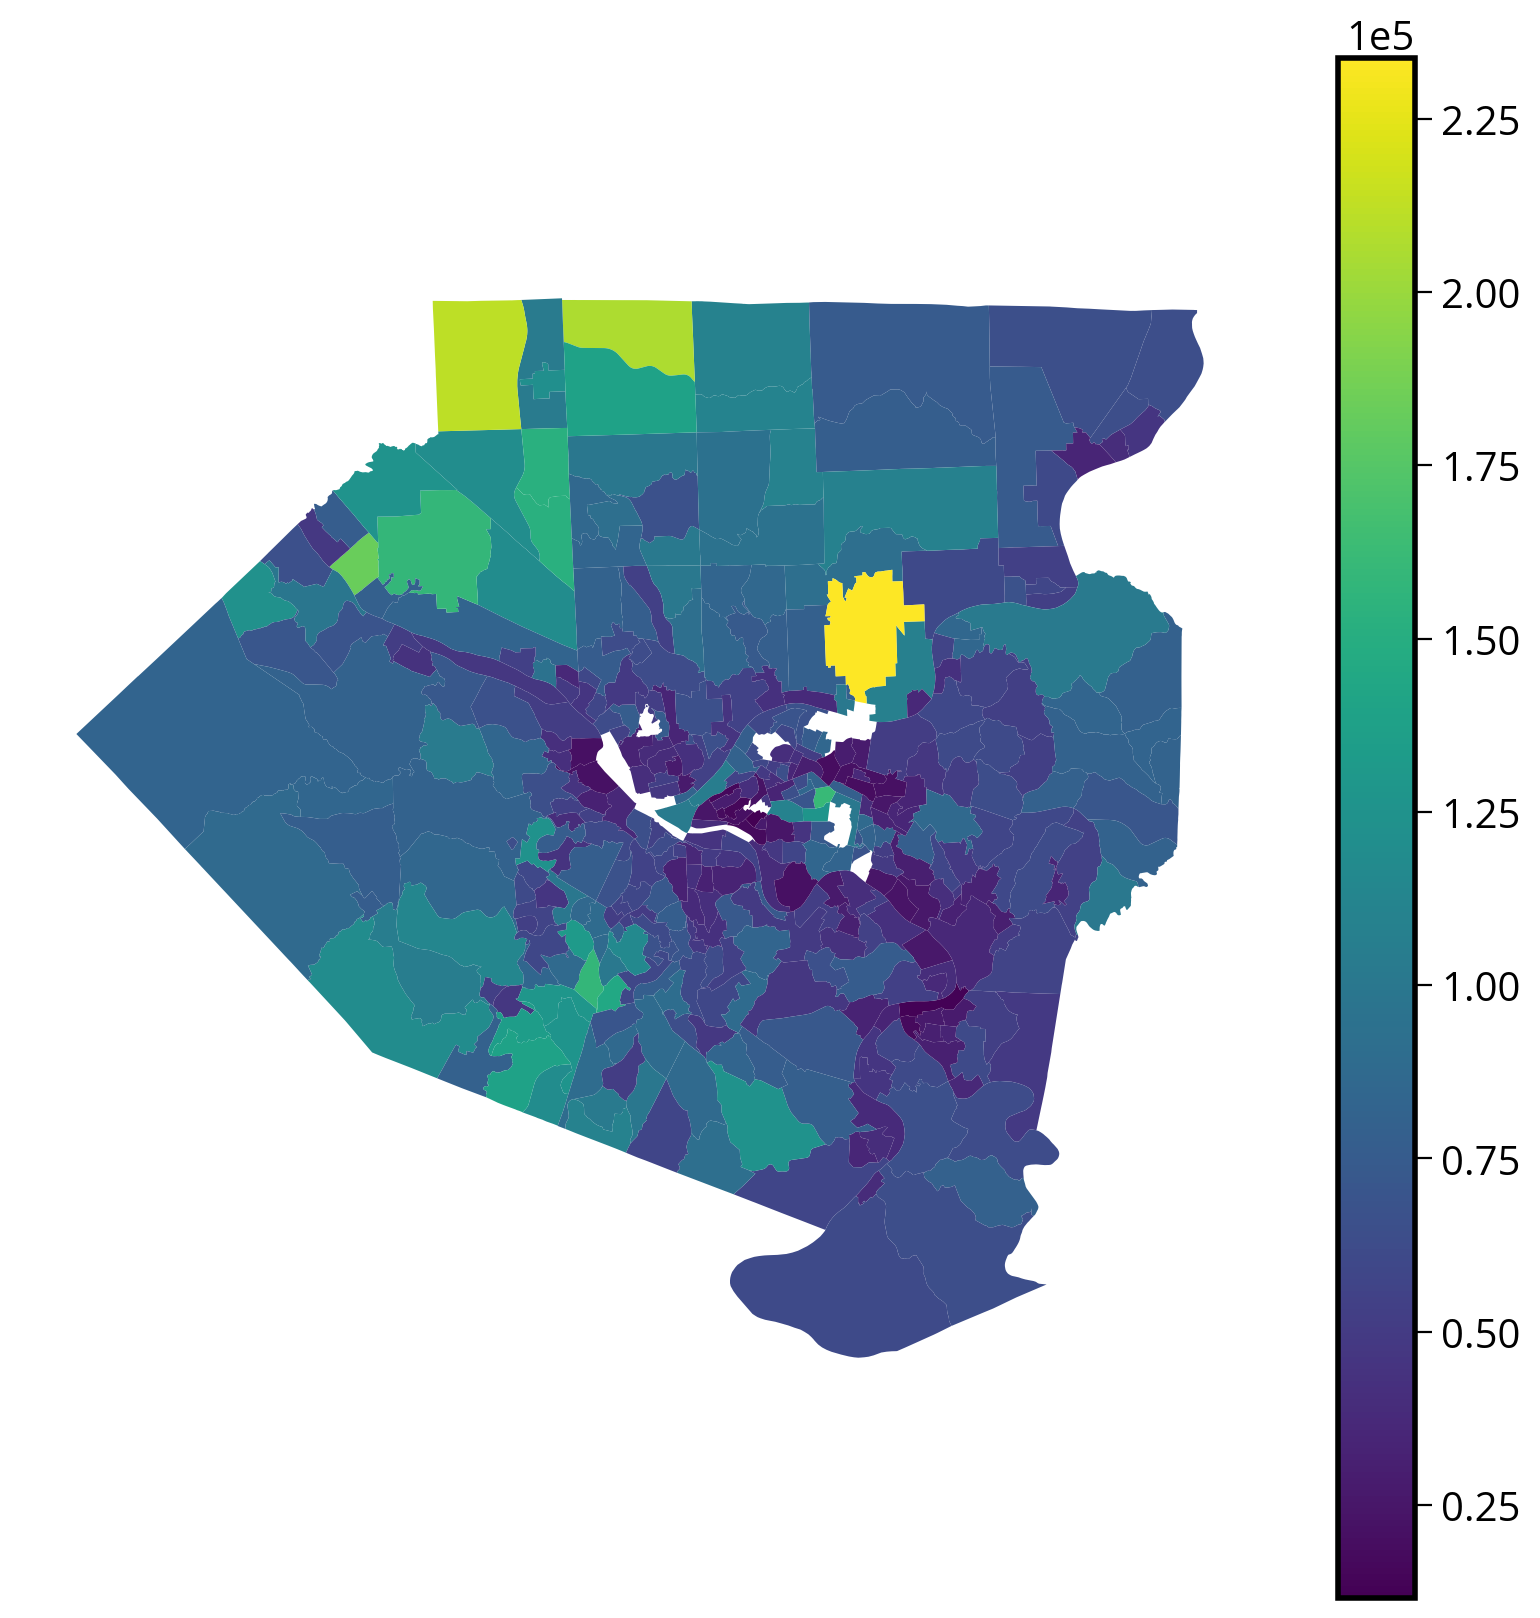

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = income.to_crs(epsg=3857).plot(ax=ax, column="B19013_001E", legend=True)

ax.set_axis_off()
ax.set_aspect("equal")

## 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [43]:
restaurants = pd.read_json('./data/restaurants_pittsburgh.json.gz', orient='records', lines=True)

In [44]:
import geopandas as gpd

In [45]:
# Create the geometry column
restaurants["geometry"] = gpd.points_from_xy(
    restaurants["longitude"], restaurants["latitude"]
)

# Initialize the GeoDataFrame
restaurants = gpd.GeoDataFrame(restaurants, geometry="geometry", crs="EPSG:4326")

## 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

You can use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

**Hint**

You can use the `.geometry.total_bounds` attribute to get the axes limits of the county's census tracts. 

```python
[xmin, ymin, xmax, ymax] = income.geometry.total_bounds
```

You can then use these limits to set the matplotlib plot limits accordingly.

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

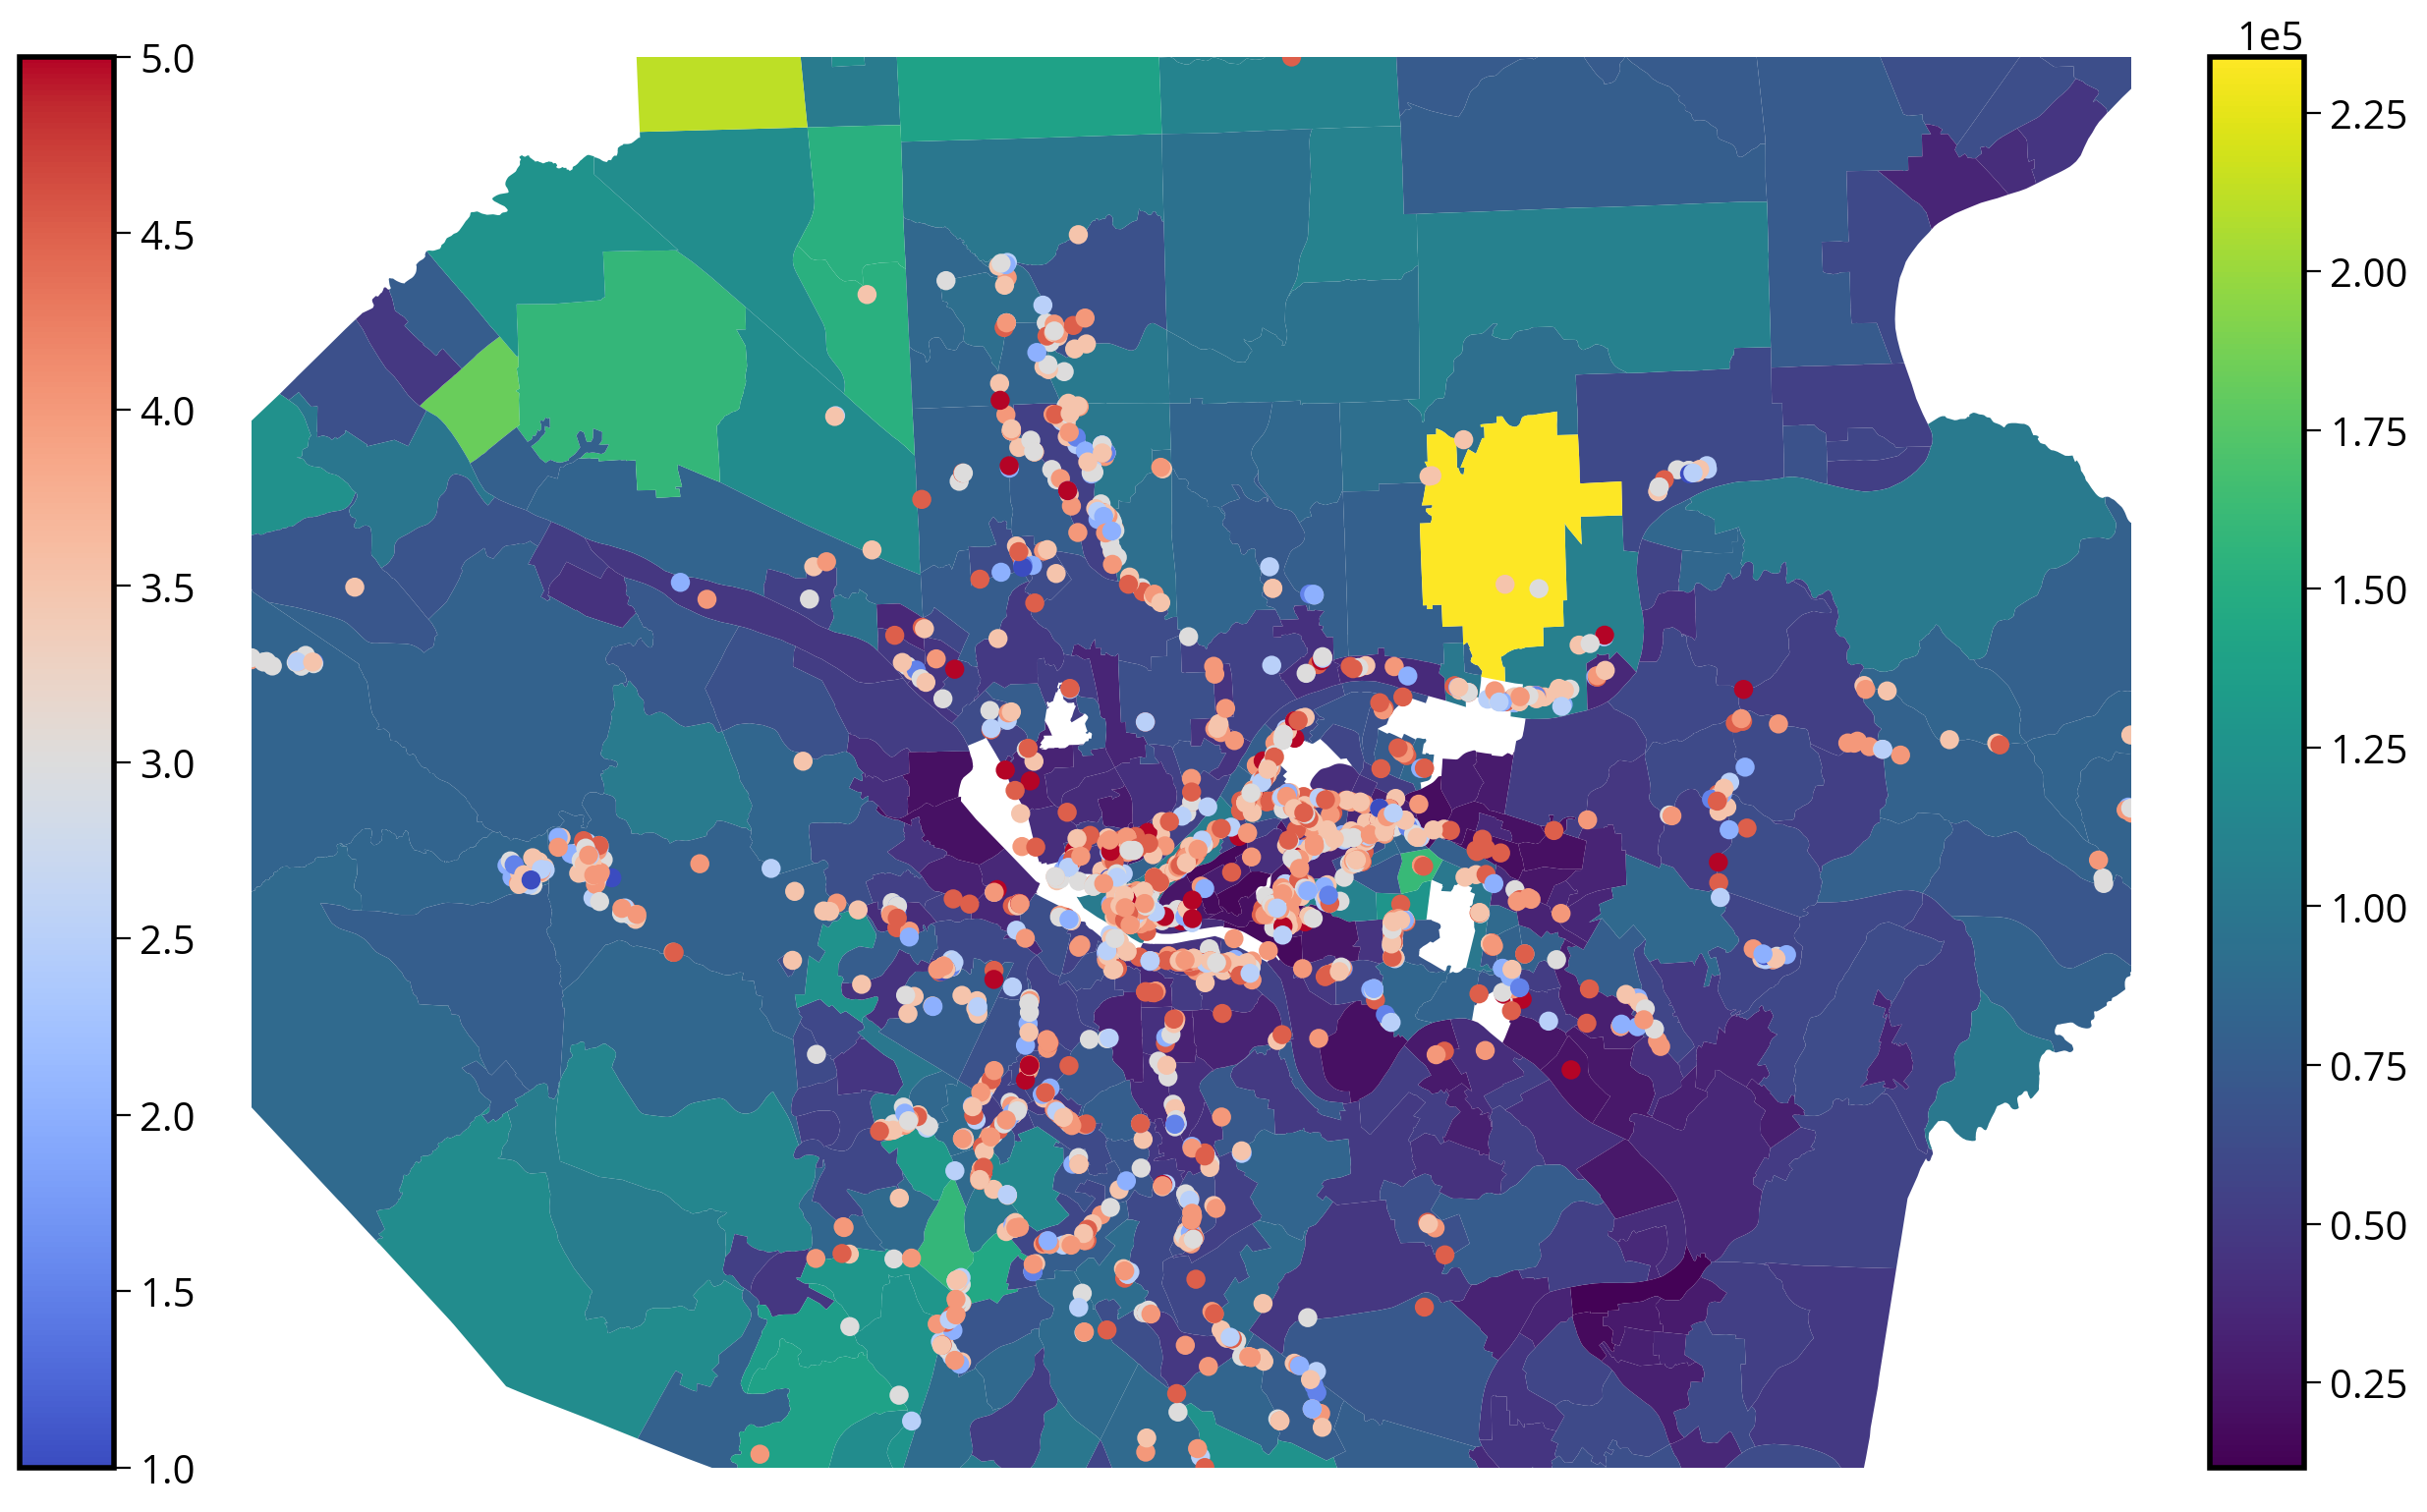

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))

# get the extent of the polygons
extent = restaurants.to_crs(epsg=3857).total_bounds

# Split axes for legends
divider = make_axes_locatable(ax)
income_cax = divider.append_axes("right", size="5%", pad=0.4)
stars_cax = divider.append_axes("left", size="5%", pad=0.7)


# plot income
income.to_crs(epsg=3857).plot(ax=ax, column="B19013_001E", legend=True, cax=income_cax)

# plot stars
restaurants.to_crs(epsg=3857).plot(
    ax=ax, column="stars", alpha=1, cmap="coolwarm", legend=True, cax=stars_cax
)

# set the limits
ax.set_xlim(extent[0], extent[2])
ax.set_ylim(extent[1], extent[3])

# format
ax.set_axis_off()
ax.set_aspect("equal")

## 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars

As we saw in Section 1, you should see strong correlation between the two subplots. 

**Hints**
- The 'business_id' column should be present in both the data frames holding review data and restaurant data.
- See the `plt.subplots()` function for creating a figure with 2 subplots.


In [48]:
restaurants.head()

,business_id,latitude,longitude,name,review_count,stars,geometry
0,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618)
1,dQj5DLZjeDK3KFysh1SYOQ,40.465694,-79.949324,Apteka,242,4.5,POINT (-79.94932 40.46569)
2,v-scZMU6jhnmV955RSzGJw,40.441062,-80.002126,No. 1 Sushi Sushi,106,4.5,POINT (-80.00213 40.44106)
3,t-6tdxRaz7s9a0sf94Tguw,40.462345,-79.924165,Impressionz,29,4.5,POINT (-79.92417 40.46235)
4,5WMIvoMx3l1vn1uJ3HZB6Q,40.442863,-79.996412,Subway,3,3.0,POINT (-79.99641 40.44286)


In [49]:
reviews.head()

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,"I'll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was n...","[i'll, first, admit, excited, going, la, tavolta., food, snob,, group, friends, suggested, go, dinner, looked, online, menu, nothing, special, seemed, overpriced., im, also, big, ordering, pasta, ...",0.245505,0.609437
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,"Wow. So surprised at the one and two star reviews! We started with the most tender calamari. Although the marinara sauce was a bit bland, but a touch of salt made it just right. My husband had th...","[wow., surprised, one, two, star, reviews!, started, tender, calamari., although, marinara, sauce, bit, bland,, touch, salt, made, right., husband, veal, peppers, said, delicious, tender., mashed,...",0.597787,0.818427
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i only had their hot pot though, so im not a good judge for anything besides their shabu. i must say, quantity was small, price is expensive for the qual...","[give, place, stars, would,, hot, pot, though,, im, good, judge, anything, besides, shabu., must, say,, quantity, small,, price, expensive, quality, quantity,, taste, soup, base, bland, put, hot, ...",0.053869,0.664137
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,"This place epitomizes the rumored transformation that is in the process of taking place in Pittsburgh. Great food, drinks, and service, but the atmosphere is second to none. Definitely a must visi...","[place, epitomizes, rumored, transformation, process, taking, place, pittsburgh., great, food,, drinks,, service,, atmosphere, second, none., definitely, must, visit, locals, visitors, alike!, fee...",0.266667,0.416667
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese restaurants: I have to look up their English names... \n\nIt's so popular that I didn't try it until recently. The bubble tea here is really good. It's...,"[here's, write, reviews, chinese, restaurants:, look, english, names..., popular, try, recently., bubble, tea, really, good., pricier, one, rose, tea,, also, get, more., like, noodles, pork, sauce...",0.227083,0.557576


In [50]:
joined = pd.merge(restaurants, reviews, on='business_id').to_crs(epsg=3857)

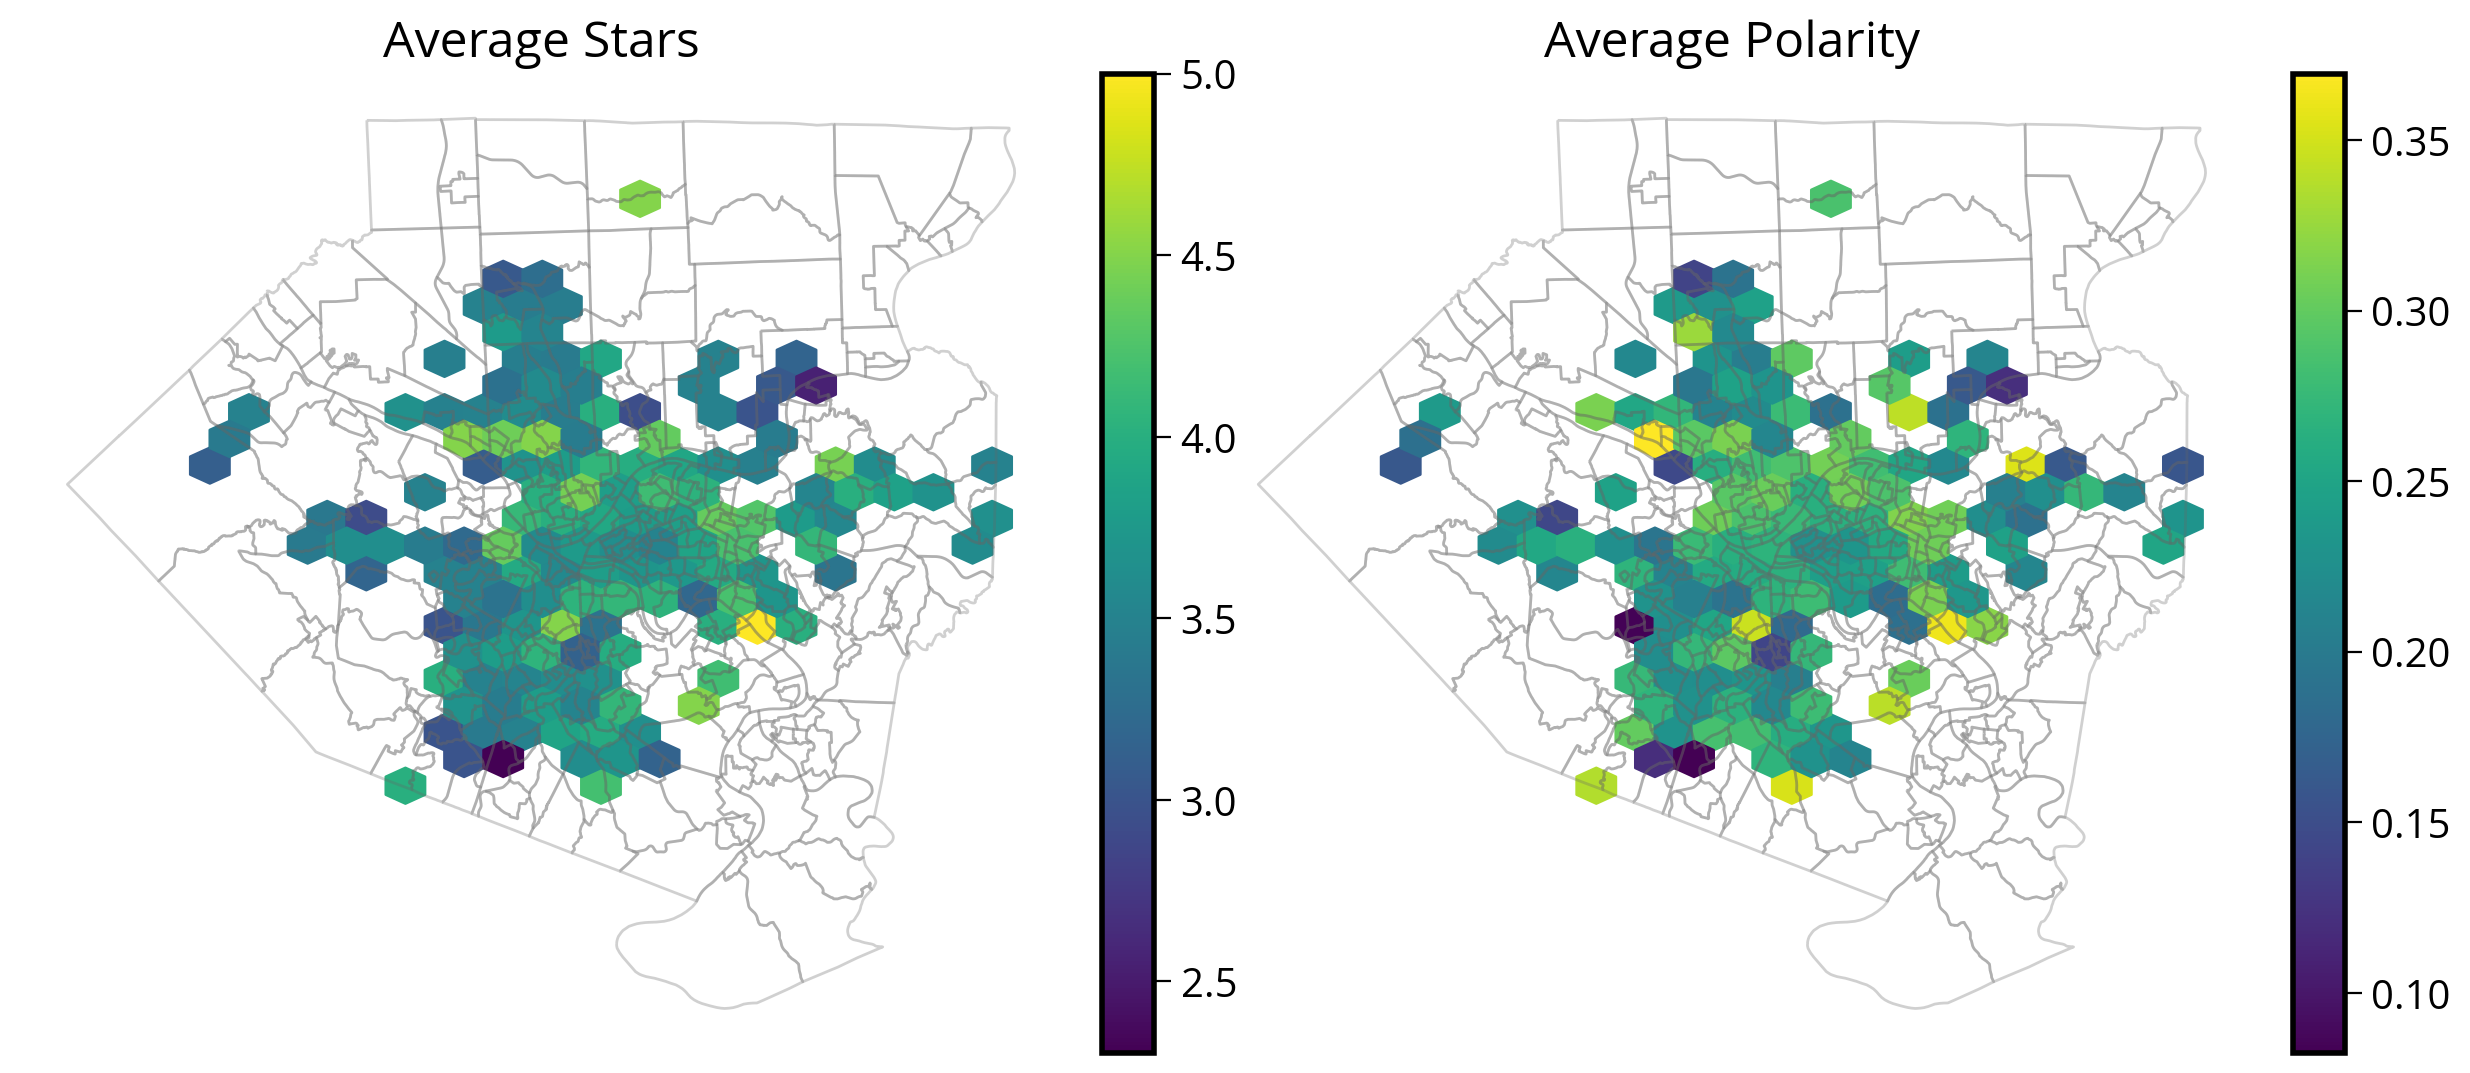

In [51]:
# Initialize two Figure with two axes
fig, axs = plt.subplots(ncols=2, figsize=(15, 10), gridspec_kw={"wspace": 0.05})

# Plot both columns
columns = ["stars_x", "polarity"]
titles = ["Average Stars", "Average Polarity"]
for i, col in enumerate(columns):

    # The axes to plot on
    ax = axs[i]

    # Setup cax for legend
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)

    # Make the hexbin plot
    hex_vals = ax.hexbin(
        x=joined.geometry.x,
        y=joined.geometry.y,
        C=joined[col],
        gridsize=20,
        cmap="viridis",
    )

    # Add tracts underneath
    tracts.to_crs(joined.crs).plot(ax=ax, facecolor="none", linewidth=1, edgecolor="#666666", alpha=0.3)

    # Add colorbar
    fig.colorbar(hex_vals, ax=ax, cax=cax)

    # Format
    ax.set_aspect("equal")
    ax.set_axis_off()
    ax.set_title(titles[i], fontsize=18)